In [1]:
! pip install yfinance


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cffi-2.0.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.6 kB)
  Using cached pycparser-2.23-py3-none-any.whl.metadata (993 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 16.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.9/411.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.9/184.9 kB 19.0 MB/s eta 0:00:00
Using cached cffi-2.0.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (219 kB)
Using cached pycparser-2.23-py3-none-any.whl (118 kB)
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=097a37352a60211c07db9eca2d1ea566d856b32f

In [2]:
import pandas as pd
import yfinance as yf

In [34]:
tickers = ["MSFT", "GOOG", "NVDA", "META",]
data = yf.download(tickers, start="2025-03-01", end="2026-01-01",interval='1d')['Close']

[*********************100%***********************]  4 of 4 completed


In [35]:
for i in tickers:

    data[f'{i}_mean'] = data[i].rolling(window=20).mean()

    data[f'{i}_std'] = data[i].rolling(window=20).std()
    
    data[f'{i}_up'] = data[f'{i}_mean'] + (data[f'{i}_std'] * 2)
    data[f'{i}_low'] = data[f'{i}_mean'] - (data[f'{i}_std'] * 2)

data.dropna()

Ticker,GOOG,META,MSFT,NVDA,MSFT_mean,MSFT_std,MSFT_up,MSFT_low,GOOG_mean,GOOG_std,GOOG_up,GOOG_low,NVDA_mean,NVDA_std,NVDA_up,NVDA_low,META_mean,META_std,META_up,META_low
Date,,,,,,,,,,,,,,,,,,,,
2025-03-28,155.631897,575.438599,376.780090,109.650093,386.192651,6.068121,398.328893,374.056410,167.399253,4.604435,176.608123,158.190383,115.225970,4.247199,123.720367,106.731572,609.154565,22.741469,654.637503,563.671628
2025-03-31,155.801437,575.059448,373.388306,108.360329,385.541145,6.708325,398.957794,372.124496,166.789027,5.279101,177.347230,156.230825,114.942546,4.512162,123.966870,105.918222,605.257996,21.476433,648.210861,562.305130
2025-04-01,158.444183,584.677673,380.152008,110.130013,385.221857,6.809596,398.841049,371.602665,166.114206,5.445902,177.006011,155.222401,114.651132,4.629782,123.910697,105.391567,602.592471,20.485800,643.564071,561.620872
2025-04-02,158.424225,582.612305,380.102325,110.399956,384.282892,6.082887,396.448665,372.117119,165.319847,5.345046,176.009940,154.629754,114.307733,4.679908,123.667549,104.947917,599.002768,16.906086,632.814940,565.190596
2025-04-03,152.211319,530.420349,371.120422,101.781532,383.100229,6.233394,395.567017,370.633441,164.253692,5.732830,175.719351,152.788032,113.869822,5.404686,124.679194,103.060449,594.225977,21.705210,637.636396,550.815557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-24,315.670013,667.549988,488.019989,188.610001,483.830002,5.457175,494.744352,472.915652,313.937714,6.216099,326.369911,301.505516,180.790501,4.704637,190.199774,171.381227,653.995578,10.755877,675.507331,632.483825
2025-12-26,314.959991,663.289978,487.709991,190.529999,483.940501,5.514840,494.970181,472.910822,313.682155,6.053609,325.789372,301.574937,181.304503,5.180023,191.664549,170.944456,655.505396,9.738670,674.982735,636.028056
2025-12-29,314.390015,658.690002,487.100006,188.220001,483.695001,5.239103,494.173207,473.216796,313.406091,5.877935,325.161960,301.650222,181.865996,5.295108,192.456211,171.275781,656.068796,9.570910,675.210616,636.926975


In [36]:
data.columns

Index(['GOOG', 'META', 'MSFT', 'NVDA', 'MSFT_mean', 'MSFT_std', 'MSFT_up',
       'MSFT_low', 'GOOG_mean', 'GOOG_std', 'GOOG_up', 'GOOG_low', 'NVDA_mean',
       'NVDA_std', 'NVDA_up', 'NVDA_low', 'META_mean', 'META_std', 'META_up',
       'META_low'],
      dtype='object', name='Ticker')

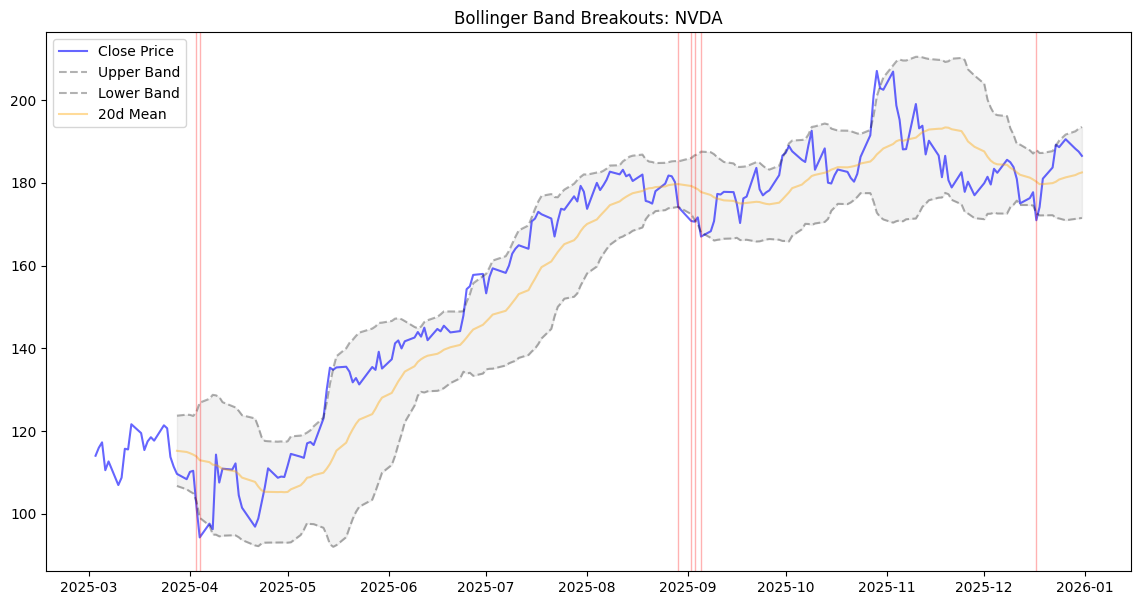

DatetimeIndex(['2025-04-03', '2025-04-04', '2025-08-29', '2025-09-02',
               '2025-09-03', '2025-09-05', '2025-12-17'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [37]:
import matplotlib.pyplot as plt

def plot_bollinger_breakouts(df, ticker):
    plt.figure(figsize=(14, 7))
    
    close_col = ticker
    upper_col = f'{ticker}_up'
    lower_col = f'{ticker}_low'
    mean_col = f'{ticker}_mean'
    
    # 1. Plot the Price and the Bands
    plt.plot(df.index, df[close_col], label='Close Price', color='blue', alpha=0.6)
    plt.plot(df.index, df[upper_col], label='Upper Band', color='black', linestyle='--', alpha=0.3)
    plt.plot(df.index, df[lower_col], label='Lower Band', color='black', linestyle='--', alpha=0.3)
    plt.plot(df.index, df[mean_col], label='20d Mean', color='orange', alpha=0.4)
    
    # Fill the area between bands
    plt.fill_between(df.index, df[lower_col], df[upper_col], color='gray', alpha=0.1)

    # 2. Identify and Plot Vertical Lines (Breakouts)
    # We filter the dataframe to find where price is outside the bands
    rises = df[df[close_col] > df[upper_col]]
    drops = df[df[close_col] < df[lower_col]]

    # Add vertical lines for Rises (Green)
    # for date in rises.index:
    #     plt.axvline(x=date, color='green', linestyle='-', alpha=0.3, linewidth=1)
        
    # Add vertical lines for Drops (Red)
    for date in drops.index:
        plt.axvline(x=date, color='red', linestyle='-', alpha=0.3, linewidth=1)

    plt.title(f"Bollinger Band Breakouts: {ticker}")
    plt.legend(loc='best')
    plt.show()

    return drops.index

# Example Usage:
dates_index =  plot_bollinger_breakouts(data, "NVDA")
dates_index

In [1]:
import pandas as pd

data = pd.read_csv('scraped_data.csv')

In [7]:
data.datetime

0        4/2/2025 5:32:20 PM
1        4/2/2025 4:11:28 PM
2        4/2/2025 2:41:46 PM
3        4/2/2025 2:25:26 PM
4        4/2/2025 1:55:01 PM
               ...          
187      2/2/2022 1:47:01 PM
188      2/2/2022 1:19:00 PM
189     2/2/2022 11:01:12 AM
190      2/7/2023 2:48:30 AM
191    9/14/2022 11:01:02 AM
Name: datetime, Length: 192, dtype: object